$$ Sales \approx f(TV,Radio,Newspaper)

## Notation

- **Sales** ---- $Y$
- **TV** ---- $X_1$
- **Radio** ---- $X_2$
- **Newspaper** ---- $X_3$


We can show $input$ $vector$ as

$$X = \begin{pmatrix}
X_1 \\
X_2 \\
X_3
\end{pmatrix}$$

Now we can write our model as 

$$Y = f(X) + \epsilon$$

where $\epsilon$ captures measurement errors and other discrepancies.

## What is $f(X)$ good for?
- With a good $f$ we can make predictions of $Y$ at new points $X = x$.
- We can understand which components of $X = (X_1,X_2,...,X_p)$ are important in explaining $Y$, and which are irrelevant. e.g. **Seniority** and **Years of Education** have a big impact on Income, but **Marital Status** typically does not.
- Depending on the complexity of $f$, we may be able to understand how each component $X_j$ of $X$ affects $Y$.

Is there an ideal $f(X)$? In particular, what is a good value for $f(X)$ at any selected value of $X$, say $X=4$? There can be many $Y$ values at $X=4$. A good value is

$$f(4) = E(Y|X=4)$$

$E(Y|X=4)$ means $expected$ $value$ (average) of $Y$ given $X=4$.

This ideal $f(x)=E(Y|X=x)$ is called $regression$ $function$ 

## The regression function $f(x)$
- Is also defined for vector $X$; e.g.
    $$f(x)=f(x_1,x_2,x_3) = E(Y|X_1=x_1,X_2=x_2,X_3=x_3)$$

- Is the $ideal$ or $optimal$ predictor of Y with regard to mean-squared prediction error: $f(x)=E(Y|X=x)$ is the function that minimizes $E[(Y-g(X))^2 | X=x]$ over all functions $g$ at all points $X=x$

- $\epsilon = Y - f(x)$ is the $irreducible$ error $-$ i.e. even if we knew $f(x)$, we would still make errors in prediction, since at each $X=x$ there is typically a distribution of possible $Y$ values.

- For any estimate $\hat{f}(x)$ of $f(x)$, we have
    $$E[(Y-\hat{f}(x))^2|X=x] = [f(x)-\hat{f}(x)] + \text{Var}(\epsilon)$$

## How to estimate $f$
- Typically we have few if any data points with $X = 4$ exactly.
- So we cannot compute $E(Y|X=x)!$
- Relax the definition and let
$$\hat{f}(x) = \text{Ave}(Y|X \in \mathcal{N}(x))$$
where $\mathcal{N}(x)$ is some $neighborhood$ of $x$

- Nearest neighbor averaging can be pretty good for small $p$ $-$ i.e. $p \le 4$ and large-ish $N$
- We will discuss smoother versions, such as kernel and spline smoothing later in the course.
- Nearest neighbor methods can be $lousy$ when $p$ is large. Reason: the $curse$ $of$ $dimensionality$. Nearest neighbors tend to be far away in high dimensions.

    - We need to get a reasonable fraction of the $N$ values of $y_i$ to average to bring the variance down -- e.g. 10%.
    - A 10% neighborhood in high dimensions need no longer be local, so we lose the spirit of estimating $E(Y|X=x)$ by local averaging.

## Parametric and structured models
The $linear$ model is an important example of a parametric model:
$$ f_L(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \text{. . . }\beta_pX_p.$$

- A linear model is specified in terms of $p+1$ parameters $\beta_0,\beta_1\text{,....,}\beta_p.$

- Although it is $almost$ $never$ $correct$, a linear model often serves as a good and interpretable approximation to the unknown true function $f(X).$

A linear model $\hat{f}_L(X) = \hat{\beta}_0 + \hat{\beta}_1X$ gives a reasonable fit here. {linear scatter}

A quadratic model $\hat{f}_Q(X) = \hat{\beta}_0 + \hat{\beta}_1X + \hat{\beta}_2X^2$ fits slightly better. {quadratic scatter}

Simulated example. Red points are simulated values for **income** from the model
$$income = f(education,seniority) + \epsilon$$
$f$ is the blue surface.

Linear regression model fit to the simulated data.

$$\hat{f}_L(education,seniority) = \hat{\beta}_0 + \hat{\beta}_1*education + \hat{\beta}_2*seniority

More flexible regression model $\hat{f}_S(education,seniority)$ fit to more simulated data. Here we use a technique called a $thin-plate$ $spline$ to fit a flexible surface. We control the roughness of the fit (chapter 7).

Even more flexible spline regression model
$\hat{f}_S(education,seniority)$ fit to the simulated data. Here the fitted model maked no errors on the training data!, Also known as $overfitting$.

## Some trade-offs
- Prediction accuracy versus interpretability.
    $-$ Linear models are easy to interpret; thin-plate splines are not.
- Good fit versus over-fit or under-fit.
    $-$ How do we know when  the fit is just right?
- Parsimony versus black-box.
    $-$ We often prefer a simpler model involving fewer variables over a black-box predictor involving them all.

models flexibility vs interpretability chart

## Assessing Model Accuracy

Suppose we fit a model $\hat{f}(x)$ to some training data $\text{Tr} = \{x_i,y_i\}_{1}^N,$ and we wish to see how well it performs.
- We could compute the average squared prediction error over $\text{Tr}:$
$$\text{MSE}_{\text{Tr}} = \text{Ave}_{i \in \text{Tr}}[y_i - \hat{f}(x_i)]^2$$
This may be biased toward more overfit models.
- Instead we should, if possible, compute it using fresh $test$ data $\text{Te} = \{x_i,y_i\}_{1}^M:$
$$\text{MSE}_{\text{Te}} = \text{Ave}_{i \in \text{Te}}[y_i - \hat{f}(x_i)]^2$$

Charts; Black curve is truth. Red curve on right is $\text{MSE}_\text{Te},$ grey curve is $\text{MSE}_\text{Tr}.$ Orange, blue and green curves/squares correspond to fits of different flexibility.

Charts; Here the truth is smoother, so the smoother fit and linear fit and linear model do really well.

Charts; Here the truth is wiggly and the noise is low, so the more flexible fits do the best.

## Bias-Variance Trade-off

Suppose we have to fit a model $\hat{f}(x)$ to some training data $\text{Tr},$ and let $(x_0,y_0)$ be a test observation drawn from the population. If the true model is $Y = f(X) + \epsilon$ $(\text{with } f(x) = E(Y|X=x))$, then

$$ E(y_0 - \hat{f}(x_0))^2 = \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon). $$

The expectation averages over the variability of $y_0$ as well as the variability in $\text{Tr}$. Note that $\text{Bias}(\hat{f}(x_0)) = E[\hat{f}{(x_0)}] - f(x_0)$.

Typically as the $flexibility$ of $\hat{f}$ increases, its variance increases, and its bias decreases. So choosing the flexibility based on average test error amounts to a $bias-variance$ $trade-off$.



Chart; Bias-variance trade-off for the three examples

## Classification Problems

Here the response variable $Y$ is $qualitative$ $-$ e.g. email is on of $C = (spam,ham)$  (**ham**=good email), digit class is one of $C = \{0,1,. . . ,9\}$. Our goals are to:
- Build a classifier $C(X)$ that assigns a class label from $C$ to a future unlabeled observation $X$.
- Assess the uncertainty in each classification
- Understand the roles of the different predictors among $X = (X_1, X_2,\text{. . . ,}X_p)$.

Is there an ideal $C(X)$? Suppose the $K$ elements in $C$ are numbered $1,2\text{, . . . ,}K$. Let
$$ p_k(x) = \text{Pr}(Y=k|X=x), k=1,2,\text{. . . ,}K.$$

These are the $conditional$ $class$ $probabilities$ at $x$; e.g. see little barplot at $x=5.$ Then the $Bayes$ $optimal$ classifier at $x$ is
$$C(x) = j\text{ if } p_j(x)=\text{max}\{{p_1(x),p_2(x)\text{, . . . ,}p_k(x)}\}$$

Nearest-neighbor averaging can be used as before.
Also breaks down as dimension grows. However, the impact on $\hat{C}(x)$ is less than on $\hat{p}_k(x)\text{, }k=1\text{, . . . ,}K.$

## Classification: some details
- Typically we measure the performance of $\hat{C}(x)$ using the misclassification error rate:
$$\text{Err}_{\text{Te}} = \text{Ave}_{i \in \text{Te}}I[y_i \ne \hat{C}(x_i)]$$

- The Bayes classifier (using the true $p_k(x)$) has smallest error (in the population).

- Support-vector machines build structured models for $C(x)$.
- We will also build structured models for representing the $p_k(x)$. e.g. Logistic regression, generalized additive models.

Example: K-nearest neighbors in two dimensions
K = 1(varies much); K=10(just right); K = 100(linear);

train, test error vs 1/K chart

## Lab Introduction to Python

### Basic Commands

In [1]:
print('fit a model with', 11, 'variables')

fit a model with 11 variables


In [2]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [3]:
3 + 5

8

In [4]:
"hello" + " " + "world"

'hello world'

In [5]:
x = [3, 4, 5]
x

[3, 4, 5]

In [6]:
y = [4, 9, 7, "abc", print]
x + y

[3,
 4,
 5,
 4,
 9,
 7,
 'abc',
 <function print(*args, sep=' ', end='\n', file=None, flush=False)>]

### Introduction to Numerical Python

In [7]:
import numpy as np

In [8]:
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])

In [9]:
x + y

array([ 7, 13, 12])

In [10]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [11]:
x.ndim

2

In [12]:
x.dtype

dtype('int64')

In [13]:
np.array([[1, 2], [3.0, 4]]).dtype

dtype('float64')

In [14]:
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

In [15]:
np.array([[1, 2], [3, 4]], float).dtype

dtype('float64')

In [16]:
x.shape

(2, 2)

In [17]:
x = np.array([1, 2, 3, 4])
x.sum()

np.int64(10)

In [18]:
x = np.array([1, 2, 3, 4])
np.sum(x)

np.int64(10)

In [19]:
x = np.array([1, 2, 3, 4, 5, 6])
print('beginning x:\n', x)
x_reshape = x.reshape((2, 3))
print('reshaped x:\n', x_reshape)

beginning x:
 [1 2 3 4 5 6]
reshaped x:
 [[1 2 3]
 [4 5 6]]


In [20]:
x_reshape[0, 0]

np.int64(1)

In [21]:
x_reshape[1, 2]
x_reshape.shape, x.shape

((2, 3), (6,))

In [22]:
print('x before we modify x_reshape:\n', x)
print('x_reshape before we modify x_reshape:\n', x_reshape)
x_reshape[0, 0] = 5
print('x_reshape after we modify its top left element:\n', x_reshape)
print('x after we modify top left element of x_reshape:\n', x)

x before we modify x_reshape:
 [1 2 3 4 5 6]
x_reshape before we modify x_reshape:
 [[1 2 3]
 [4 5 6]]
x_reshape after we modify its top left element:
 [[5 2 3]
 [4 5 6]]
x after we modify top left element of x_reshape:
 [5 2 3 4 5 6]


Modifying x_reshape also modified x because the two objects occupy the same space in memory.

In [23]:
%% except TypeError

my_tuple = (3, 4, 5)
my_tuple[0] = 2

UsageError: Cell magic `%%` not found.


In [24]:
x_reshape.shape, x_reshape.ndim, x_reshape.T

((2, 3),
 2,
 array([[5, 4],
        [2, 5],
        [3, 6]]))

In [25]:
x**2

array([25,  4,  9, 16, 25, 36])

In [26]:
x**0.5

array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974])

We now generate 50 independent random variables from a $N(0,1)$ distribution

In [27]:
x = np.random.normal(0, 0.1,size=50)
x

array([-0.09883817, -0.15290333,  0.02175278, -0.10662136, -0.06913953,
       -0.05381761,  0.14428841, -0.07369423, -0.14075794, -0.22956874,
        0.08179859, -0.15990472, -0.04767079,  0.05277696,  0.02888851,
        0.00749461,  0.07835417,  0.09148851, -0.09379264,  0.03965436,
       -0.00967088, -0.05583636, -0.02702874,  0.06559237,  0.19323347,
       -0.08222027, -0.05283959,  0.07838933,  0.15915212,  0.15913066,
        0.12129153,  0.00602774, -0.09887541, -0.00863407, -0.05984421,
       -0.05032364, -0.00307303,  0.03935681, -0.10138308, -0.16491365,
        0.13565152,  0.04847822,  0.03083794, -0.07748866, -0.02396769,
        0.00912602,  0.09846811,  0.00786006,  0.21351849, -0.10682162])

In [30]:
y = x + np.random.normal(loc=50, scale=1, size=50)

In [31]:
np.corrcoef(x, y)

array([[ 1.        , -0.10857495],
       [-0.10857495,  1.        ]])

In [32]:
print(np.random.normal(scale=5, size=2))
print(np.random.normal(scale=5, size=2))

[ 0.09636252 -6.28814009]
[-1.21783887 -2.81046481]


In [33]:
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))
rng2 = np.random.default_rng(1303)
print(rng.normal(scale=5, size=12))

[ 4.09482632 -1.07485605]
[-10.15364596   1.13406146  -4.14030566  -4.74859823   0.48740125
   5.65355173  -2.51588502  -8.07334198  -2.55718914   6.54287834
  -3.00531353  -5.21791791]


### Graphics

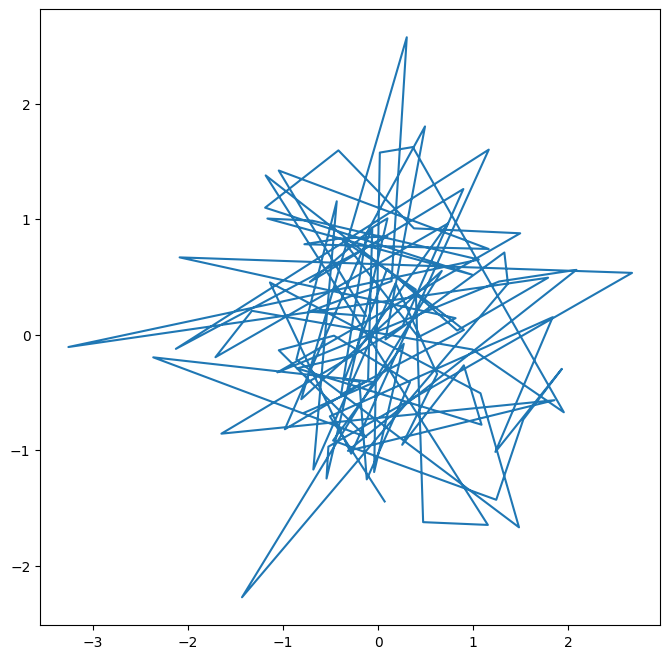

In [35]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

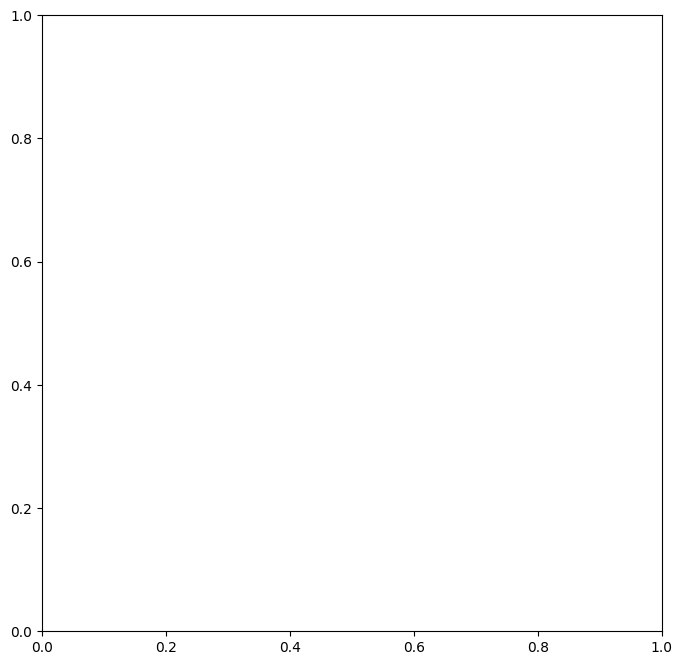

In [36]:
output = subplots(figsize=(8, 8))
fig = output[0]
ax = output[1]

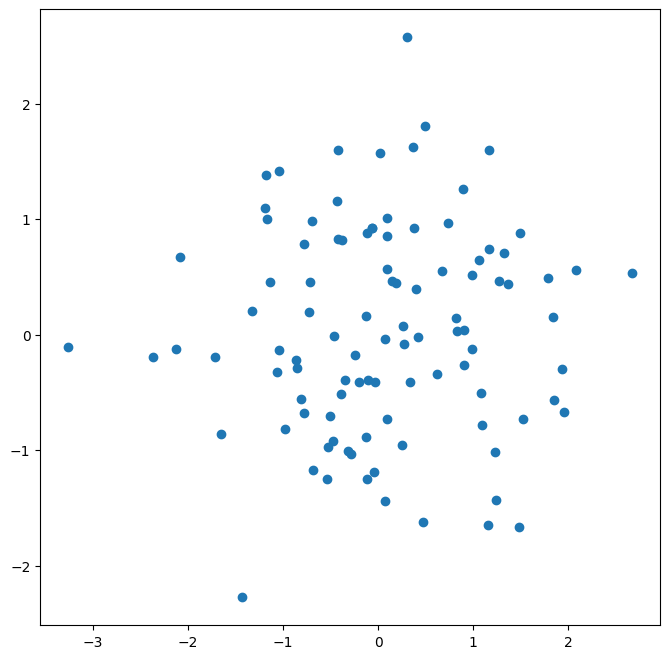

In [37]:
fig, ax = subplots(figsize=(8,8))
ax.plot(x, y, 'o');

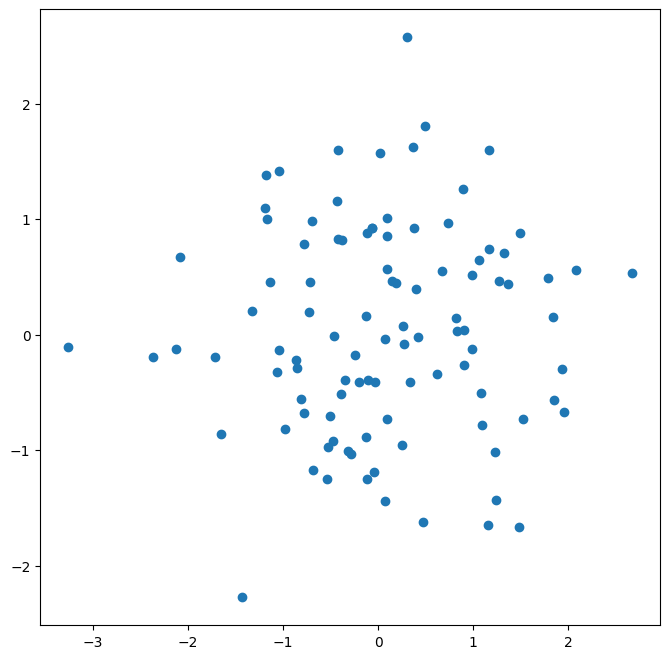

In [38]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

Text(0.5, 1.0, 'Plot of X vs Y')

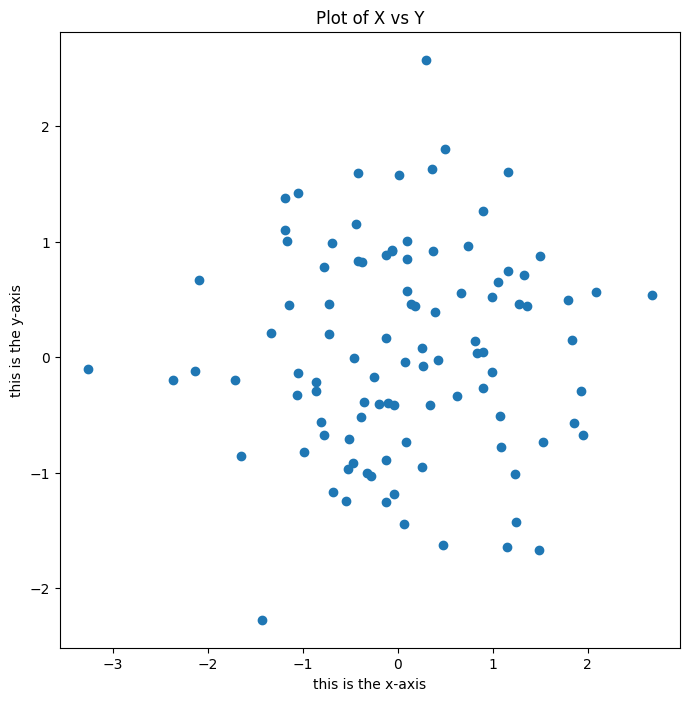

In [39]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y")

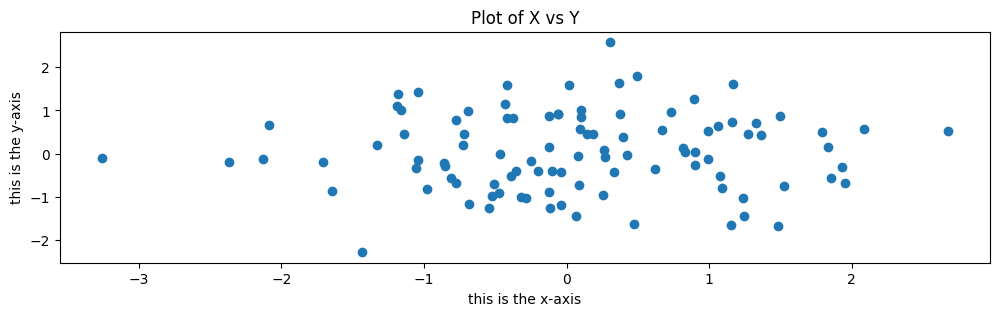

In [40]:
fig.set_size_inches(12,3)
fig

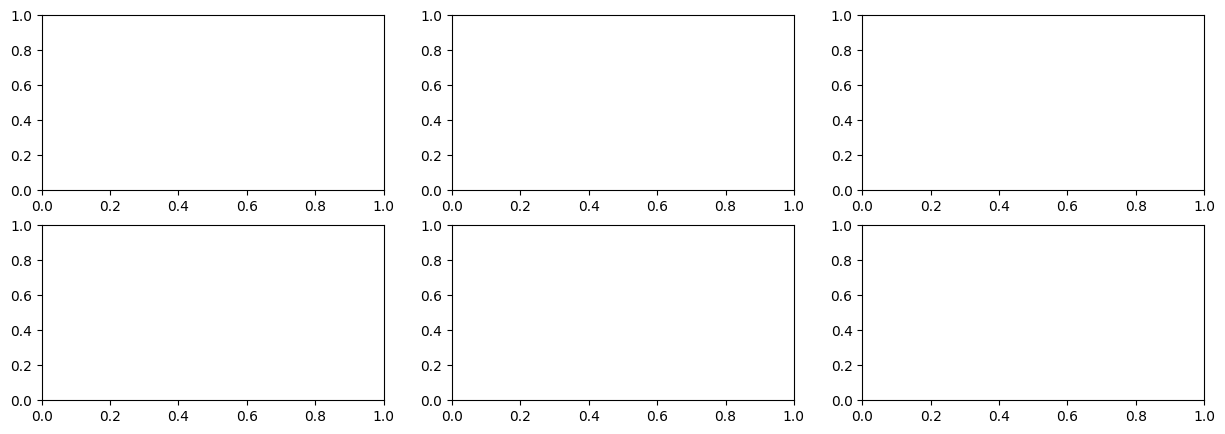

In [41]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15, 5))

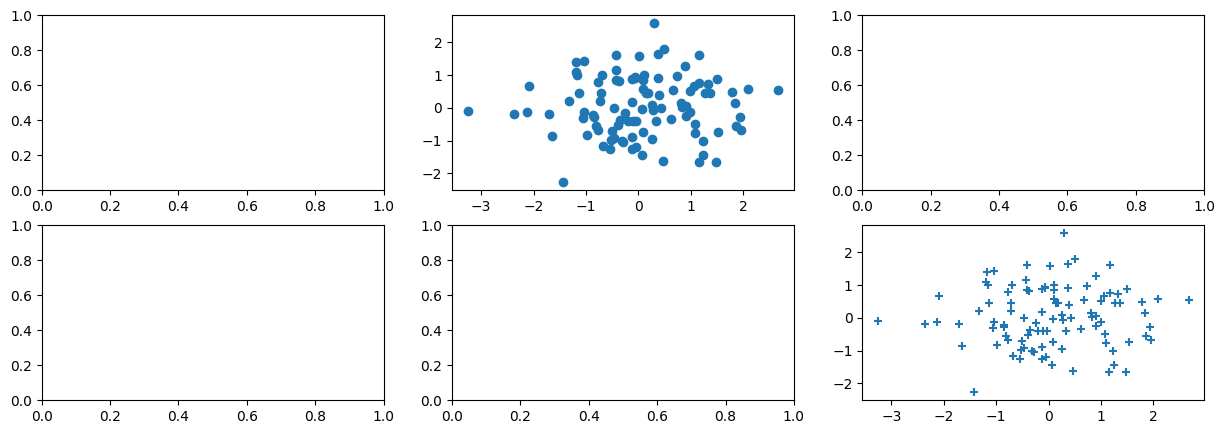

In [42]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

In [ ]:
fig.savefig("figure.png", dpi=400)
fig.savefig("Figure.pdf", dpi=200)

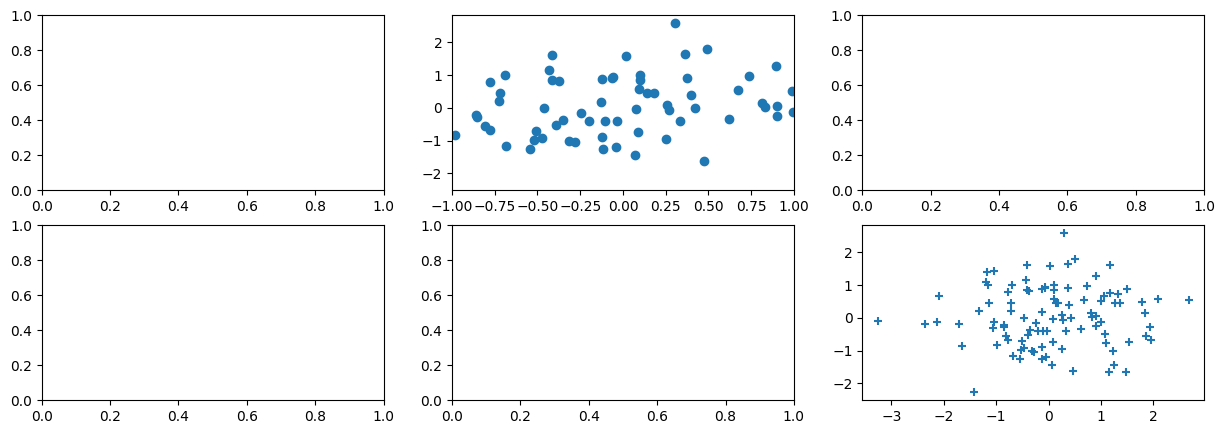

In [43]:
axes[0,1].set_xlim([-1,1])
fig.savefig("Figure_updated.jpg")
fig

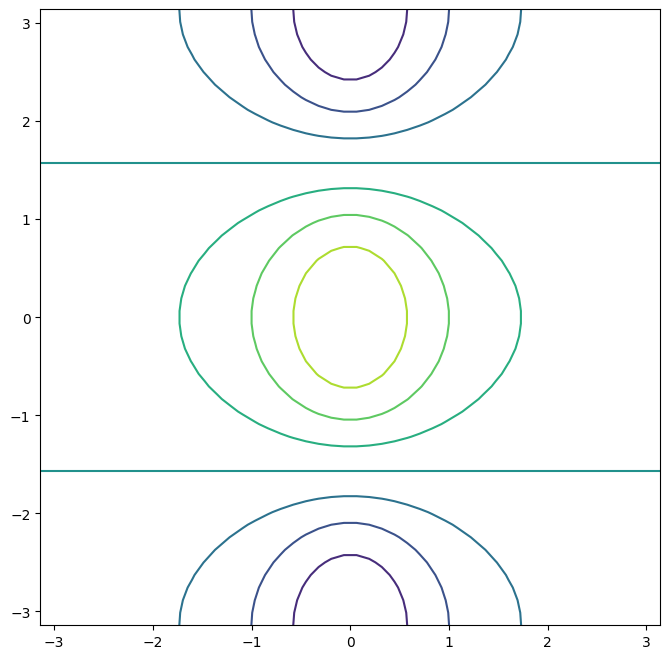

In [45]:
fig, ax = subplots(figsize=(8, 8))
X = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1+x**2))
ax.contour(X, y, f);

/tmp/ipykernel_28639/820371411.py:2: UserWarning: The following kwargs were not used by contour: 'level'
  ax.contour(X, y, f, level=45);


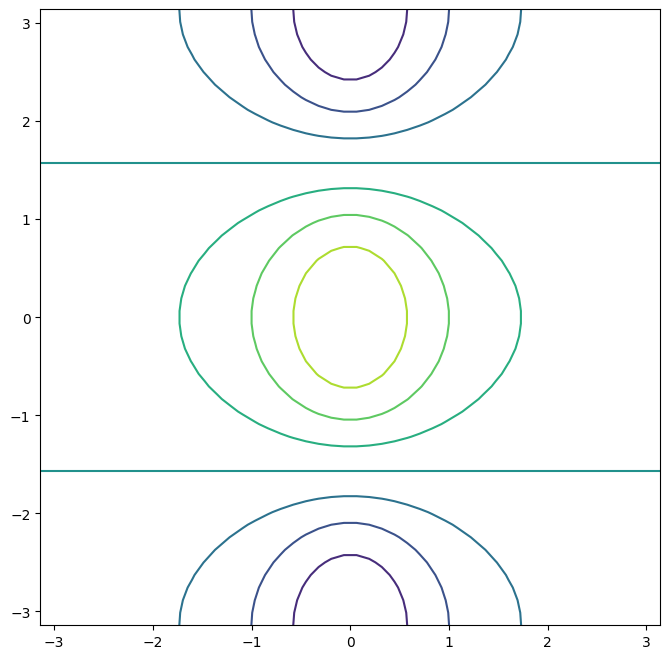

In [46]:
fig, ax = subplots(figsize=(8, 8))
ax.contour(X, y, f, level=45);

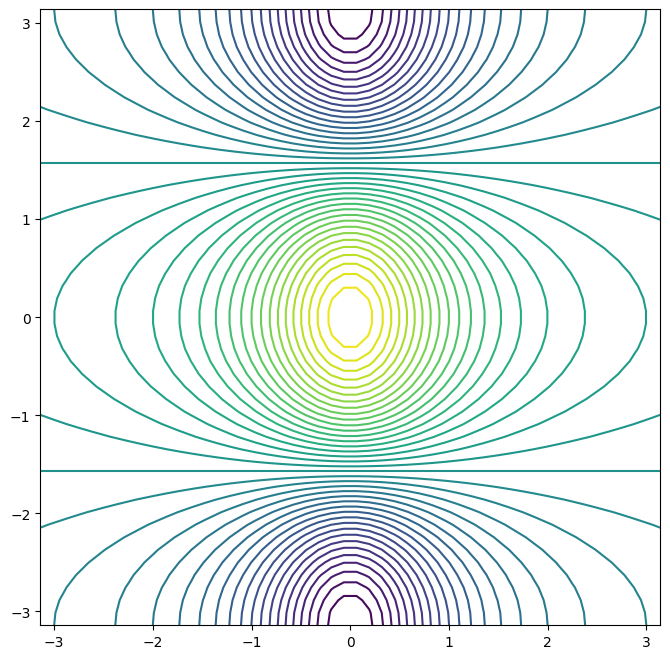

In [47]:
fig, ax = subplots(figsize=(8, 8))
ax.contour(X, y, f, levels=45);

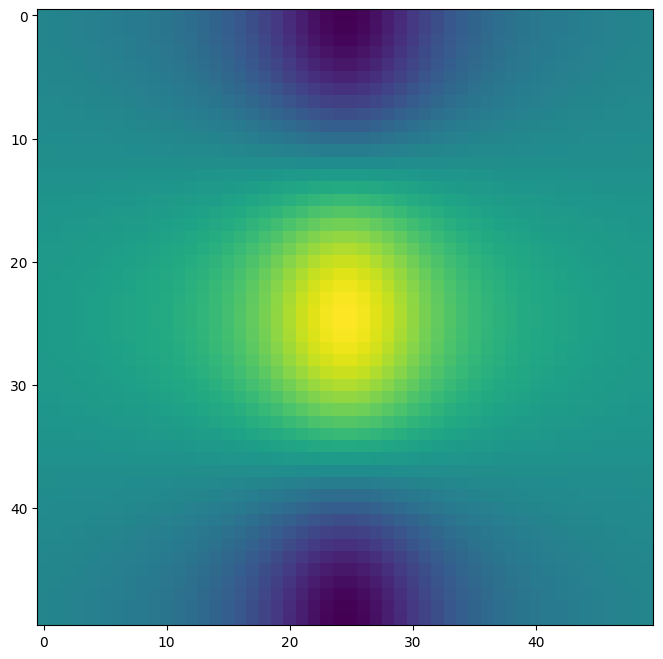

In [49]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);

### Reading in a Dataset

In [51]:
import pandas as pd
Auto = pd.read_csv('datasets/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [52]:
Auto = pd.read_csv('datasets/Auto.data', delim_whitespace=True)

/tmp/ipykernel_28639/235409218.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Auto = pd.read_csv('datasets/Auto.data', delim_whitespace=True)


In [53]:
Auto['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392    86.00
393    52.00
394    84.00
395    79.00
396    82.00
Name: horsepower, Length: 397, dtype: object

In [54]:
np.unique(Auto['horsepower'])

array(['100.0', '102.0', '103.0', '105.0', '107.0', '108.0', '110.0',
       '112.0', '113.0', '115.0', '116.0', '120.0', '122.0', '125.0',
       '129.0', '130.0', '132.0', '133.0', '135.0', '137.0', '138.0',
       '139.0', '140.0', '142.0', '145.0', '148.0', '149.0', '150.0',
       '152.0', '153.0', '155.0', '158.0', '160.0', '165.0', '167.0',
       '170.0', '175.0', '180.0', '190.0', '193.0', '198.0', '200.0',
       '208.0', '210.0', '215.0', '220.0', '225.0', '230.0', '46.00',
       '48.00', '49.00', '52.00', '53.00', '54.00', '58.00', '60.00',
       '61.00', '62.00', '63.00', '64.00', '65.00', '66.00', '67.00',
       '68.00', '69.00', '70.00', '71.00', '72.00', '74.00', '75.00',
       '76.00', '77.00', '78.00', '79.00', '80.00', '81.00', '82.00',
       '83.00', '84.00', '85.00', '86.00', '87.00', '88.00', '89.00',
       '90.00', '91.00', '92.00', '93.00', '94.00', '95.00', '96.00',
       '97.00', '98.00', '?'], dtype=object)

In [58]:
Auto = pd.read_csv('datasets/Auto.data',
                   na_values=['?'], 
                   delim_whitespace=True)
Auto['horsepower']

/tmp/ipykernel_28639/3352236681.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Auto = pd.read_csv('datasets/Auto.data',


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

In [59]:
Auto.shape

(397, 9)

In [60]:
Auto_new = Auto.dropna()
Auto_new.shape

(392, 9)

### Basics of Selecting Rows and Columns

In [61]:
Auto = Auto_new # overwrite the previous value
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [62]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [63]:
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490.0,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635.0,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620.0,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725.0,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385.0,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755.0,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875.0,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760.0,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065.0,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975.0,19.4,81,3,datsun 210 mpg


In [64]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


Additional Graphical and Numerical Summaries

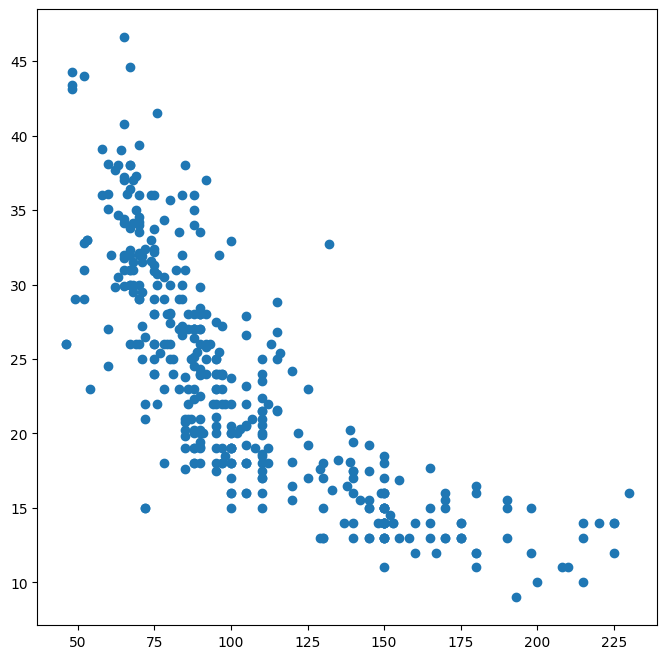

In [66]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

Text(0.5, 1.0, 'Horsepower vs. MPG')

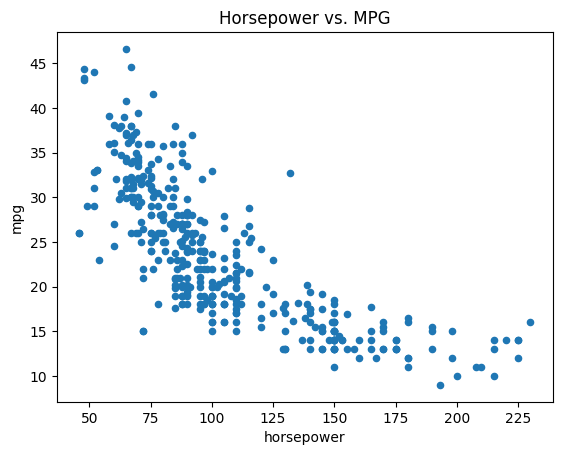

In [67]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower vs. MPG')